In [315]:
import pandas as pd
import numpy as np
from sklearn import set_config
set_config(transform_output="pandas") # This keeps the output as a DataFrame
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
df = pd.read_csv("data.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [317]:
df.shape

(7043, 21)

In [318]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [319]:
X = df.iloc[:,:-1]
X.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
565,5846-NEQVZ,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),70.85,4973.40
2880,2187-PKZAY,Male,0,No,No,12,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.95,1043.40
76,6416-JNVRK,Female,0,No,No,46,Yes,No,DSL,No,No,No,No,No,Yes,One year,No,Credit card (automatic),55.65,2688.85
4939,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90
3257,5482-VXSXJ,Male,0,No,No,22,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.20,2157.30
917,4079-WWQQQ,Male,0,No,No,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65.55,4807.45
2644,2011-TRQYE,Male,0,No,No,18,No,No phone service,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),33.50,600.00
3842,1194-HVAIF,Female,0,Yes,No,27,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic),95.00,2462.55
4105,5055-BRMNE,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),106.70,7009.50
5764,0716-BQNDX,Male,1,No,No,57,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,Two year,No,Electronic check,93.75,5625.55


In [320]:
y = df.iloc[:,-1]
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [321]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [323]:
X.drop(['customerID', 'gender'], axis=1, inplace=True)

In [324]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64
 17  

In [325]:
#Categorial
# Partner, Dependents, PaperlessBilling, gender
# MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection , TechSupport, StreamingTV, StreamingMovies
# InternetService
# Contract
# PaymentMethod

X['MultipleLines'] = X['MultipleLines'].replace('No phone service', 'No')
X['OnlineSecurity'] = X['OnlineSecurity'].replace('No internet service', 'No')
X['OnlineBackup'] = X['OnlineBackup'].replace('No internet service', 'No')
X['DeviceProtection'] = X['DeviceProtection'].replace('No internet service', 'No')
X['TechSupport'] = X['TechSupport'].replace('No internet service', 'No')
X['StreamingTV'] = X['StreamingTV'].replace('No internet service', 'No')
X['StreamingMovies'] = X['StreamingMovies'].replace('No internet service', 'No')

In [326]:
transformer = ColumnTransformer(
    transformers=[

        ('tnf1', OrdinalEncoder(), [
                                    'Partner', 
                                    'Dependents', 
                                    'PaperlessBilling', 
                                    'PhoneService', 
                                    'MultipleLines', 
                                    'OnlineSecurity', 
                                    'OnlineBackup', 
                                    'DeviceProtection', 
                                    'TechSupport', 
                                    'StreamingTV', 
                                    'StreamingMovies']),

        ('ohe_drop', OneHotEncoder(drop='first', sparse_output=False), ['InternetService', 'PaymentMethod', 'Contract']),
        ('num_scaling', StandardScaler(), ['MonthlyCharges', 'TotalCharges', 'tenure'])
    ], 
    remainder='passthrough',
    verbose_feature_names_out=False

)

In [327]:
X_transformed = transformer.fit_transform(X)

In [328]:
X_transformed.sample(10)

,Partner,Dependents,PaperlessBilling,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,MonthlyCharges,TotalCharges,tenure,SeniorCitizen
217,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.272512,0.664384,1.368109,0
3270,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.198378,-0.831219,-1.158016,0
2133,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.191192,-0.976238,-1.280248,1
784,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.804359,0.134849,1.245878,0
2613,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.511962,-0.971980,-1.280248,0
3318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.173328,-0.894750,-0.913552,0
5246,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.497004,-0.934788,-1.239504,0
3368,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.975667,0.937589,0.553230,0
4091,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.136345,-0.402782,-0.506113,0
6267,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.176234,-0.976436,-1.280248,0


In [329]:
X_transformed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Partner                                7032 non-null   float64
 1   Dependents                             7032 non-null   float64
 2   PaperlessBilling                       7032 non-null   float64
 3   PhoneService                           7032 non-null   float64
 4   MultipleLines                          7032 non-null   float64
 5   OnlineSecurity                         7032 non-null   float64
 6   OnlineBackup                           7032 non-null   float64
 7   DeviceProtection                       7032 non-null   float64
 8   TechSupport                            7032 non-null   float64
 9   StreamingTV                            7032 non-null   float64
 10  StreamingMovies                        7032 non-null   float64
 11  InternetS

In [330]:
# Finding the boundary values
print("Highest allowed",X_transformed['TotalCharges'].mean() + 3*X_transformed['TotalCharges'].std())


Highest allowed 3.0002133333336025


In [331]:
# Finding the outliers
X_transformed[(X_transformed['TotalCharges'] > 9083.614526491301) | (X_transformed['TotalCharges'] < 0)]

,Partner,Dependents,PaperlessBilling,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,MonthlyCharges,TotalCharges,tenure,SeniorCitizen
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.161694,-0.994194,-1.280248,0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,-0.260878,-0.173740,0.064303,0
2,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.363923,-0.959649,-1.239504,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.747850,-0.195248,0.512486,0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.196178,-0.940457,-1.239504,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.137888,-0.679429,-0.832064,0
7037,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.450886,-0.381142,1.612573,0
7038,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.664868,-0.129180,-0.343137,0
7040,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.170004,-0.854514,-0.872808,0


In [332]:
X_transformed.sample(10)

,Partner,Dependents,PaperlessBilling,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,MonthlyCharges,TotalCharges,tenure,SeniorCitizen
3500,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.980653,1.467764,1.042158,0
5808,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.449343,2.398383,1.612573,0
5970,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.809464,-0.825043,-1.117272,0
700,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.049801,0.841080,1.368109,0
591,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-1.326234,-0.489056,0.553230,0
6121,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.505733,-0.937060,-0.995040,0
5802,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.506857,-0.090598,0.390254,0
6002,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.600050,-0.804307,-1.076528,0
5945,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.013893,1.448926,1.001414,1
2338,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.490774,-0.423739,1.612573,0


In [333]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Partner                                7032 non-null   float64
 1   Dependents                             7032 non-null   float64
 2   PaperlessBilling                       7032 non-null   float64
 3   PhoneService                           7032 non-null   float64
 4   MultipleLines                          7032 non-null   float64
 5   OnlineSecurity                         7032 non-null   float64
 6   OnlineBackup                           7032 non-null   float64
 7   DeviceProtection                       7032 non-null   float64
 8   TechSupport                            7032 non-null   float64
 9   StreamingTV                            7032 non-null   float64
 10  StreamingMovies                        7032 non-null   float64
 11  InternetS

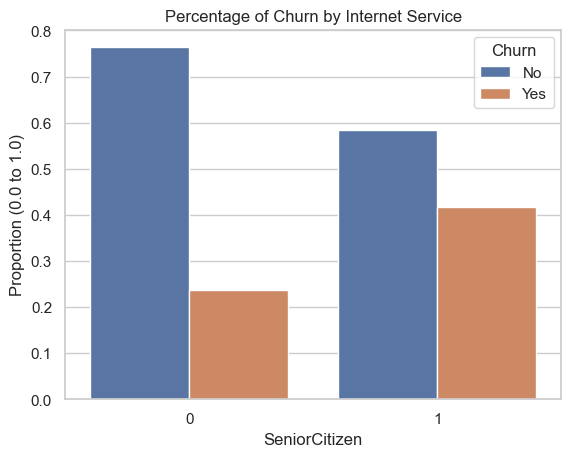

In [334]:
# Calculate percentages
churn_pct = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).rename('percentage').reset_index()

# Plot percentages
sns.barplot(data=churn_pct, x='SeniorCitizen', y='percentage', hue='Churn')
plt.title('Percentage of Churn by Internet Service')
plt.ylabel('Proportion (0.0 to 1.0)')
plt.show()